In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cho_factor, cho_solve

Define the Gaussian kernel

In [2]:
# MULTIDIMENSIONAL KERNEL DEFINITION
# def gaussian_kernel(x, z, theta=1.):
#         """
#         Evaluate the Gram matrix for a Gaussian kernel between points in x and z.
#         Inputs:
#             x : array of shape (N, d)
#             z : array of shape (M, d)
#             theta : lengthscale parameter (>0)
#         Outputs:
#             k : Gram matrix of shape (N, M)
#         """
#         # reshape the matricies correctly for broadcasting
#         x = np.expand_dims(x, axis=1)
#         z = np.expand_dims(z, axis=0)
#         # now evaluate the kernel using the euclidean distances squared between points
#         return np.exp(-np.sum(np.square(x-z)/theta, axis=2, keepdims=False))

# ONE-DIMENSIONAL KERNEL DEFINITION
def gaussian_kernel(x, z, theta=1.):
        """
        Evaluate the Gram matrix for a Gaussian kernel between points in x and z in 1D.
        Inputs:
            x : array of shape (N, 1)
            z : array of shape (M, 1)
            theta : lengthscale parameter (>0)
        Outputs:
            k : Gram matrix of shape (N, M)
        """
        return np.exp(-np.square(x-np.transpose(z))/theta)

Plot the effects of changing lengthscale ($\theta$) on
* the appearance of the kernel
* the kernel's basis functions
* RBF fit to data (with $\lambda = 10^{-6}$)

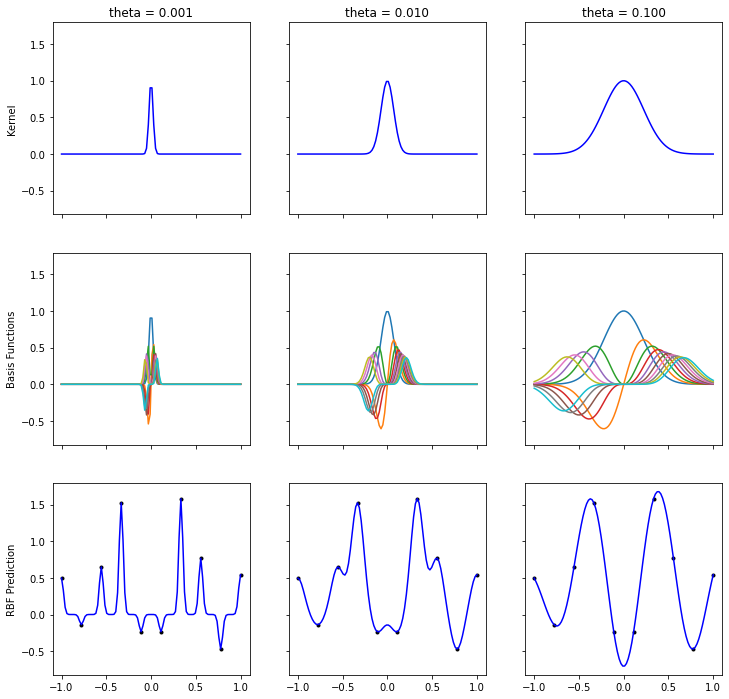

In [3]:
np.random.seed(42)
# generate a fictitious one-dimensional dataset from noise
x = np.linspace(-1, 1, num=10).reshape((-1,1))
y = np.random.randn(*x.shape)
xx = np.linspace(-1, 1, num=100).reshape((-1,1)) # inputs for plotting

# loop over various values of theta
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12), sharex=True, sharey=True)
for i,theta in enumerate([0.001, 0.01, 0.1]):
    # plot the kernel
    axs[0,i].plot(xx, gaussian_kernel(xx, [[0]], theta), 'b')
    # plot the basis functions
    for j in range(10):
        axs[1,i].plot(xx, 
            np.sqrt(np.power(2,j)/np.math.factorial(j))*np.power(xx/np.sqrt(theta),j)*np.exp(-np.square(xx)/theta))
    # plot the RBF model
    K = gaussian_kernel(x, x, theta) # form Gram matrix
    C = cho_factor(K + 1e-6*np.identity(x.size)) # cholesky factorize
    alpha = cho_solve(C, y) # compute parameters
    yy = gaussian_kernel(xx, x, theta).dot(alpha) # predict
    axs[2,i].plot(x, y, 'k.') # plot training data
    axs[2,i].plot(xx, yy, 'b') # plot RBF prediction
    # set the labels
    axs[0,i].set_title("theta = %.3f" % theta)
    if i == 0:
        axs[0,0].set_ylabel('Kernel')
        axs[1,0].set_ylabel('Basis Functions')
        axs[2,0].set_ylabel('RBF Prediction')

Explore the effects of varying the regularization hyperparameter $\lambda$ on the RBF prediction with lengthscale $\theta = 0.10$ held fixed.

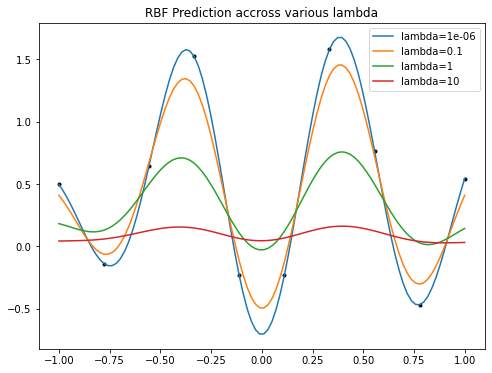

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
K = gaussian_kernel(x, x, theta=0.10) # form Gram matrix
ax.plot(x, y, 'k.') # plot the training data
# plot the RBF model with various values of lambda
for lam in [1e-6, 0.1, 1., 10.]:
    C = cho_factor(K + lam*np.identity(x.size)) # cholesky factorize
    alpha = cho_solve(C, y) # compute parameters
    yy = gaussian_kernel(xx, x, theta=0.10).dot(alpha) # predict
    ax.plot(xx, yy, label='lambda=%.2g'%lam) # plot RBF prediction
ax.legend(loc=0)
ax.set_title("RBF Prediction accross various lambda");